# Take home challenge-2: Relax Inc. 

Relax Inc. is popular for making productivity and project management software which are very useful for individuals and teams.  Here, in this project, we are going to identify the "adopted user" and which factors predict future user adoption.

## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset (users information)

In [2]:
# Import takehome_users.csv
users_infromation = pd.read_csv('takehome_users.csv')

In [3]:
users_infromation.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users_infromation.shape

(12000, 10)

In [5]:
users_infromation.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [6]:
users_infromation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
users_infromation.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

**Here, one can see two columns has null values which are quite significant.**

In [8]:
users_infromation.object_id.nunique()

12000

# Data wrangling (users information dataset)

In [9]:
# Rename 'object_id' column with 'user_id'
users_infromation.rename(columns= {'object_id':'user_id'}, inplace = True)

In [10]:
users_infromation.head(1)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0


**Here one can see that the "creation_time" and "last_session_creation_time" are object and float64 respectively. Hence we need to change them to timestamp.** 

In [11]:
users_infromation.creation_time = pd.to_datetime(users_infromation.creation_time)
users_infromation.last_session_creation_time = pd.to_datetime(users_infromation.last_session_creation_time, unit = 's')

In [12]:
users_infromation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [13]:
users_infromation.head(2)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0


In [14]:
# Get the minimum and maximum of 'creation_time' column
users_infromation.creation_time.min(), users_infromation.creation_time.max()

(Timestamp('2012-05-31 00:43:00'), Timestamp('2014-05-30 23:59:00'))

In [15]:
# Get the minimum and maximum of 'last_session_creation_time' column
users_infromation.last_session_creation_time.min(), users_infromation.last_session_creation_time.max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

## Import dataset (user engagement)

In [16]:
# Import another dataset "takehome_user_engagement.csv"
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [17]:
user_engagement.shape

(207917, 3)

In [18]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [19]:
#user_engagement.info()

**There is no null value in 'user_engagement' dataset.**

In [20]:
user_engagement.user_id.value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
3267       1
1218       1
7361       1
11335      1
2047       1
Name: user_id, Length: 8823, dtype: int64

In [21]:
user_engagement.user_id.nunique()

8823

## Data wrangling (user_engagement dataset)

**Here also 'time_stamp' column is object, hence we need to convert that to timestamp.**

In [22]:
user_engagement.time_stamp = pd.to_datetime(user_engagement.time_stamp)

In [23]:
user_engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [24]:
user_engagement.time_stamp.min(), user_engagement.time_stamp.max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [25]:
user_engagement2 = user_engagement.sort_values(by = ['user_id'])

In [26]:
user_engagement2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
14,2014-03-31 03:45:04,2,1
13,2014-03-13 03:45:04,2,1
12,2014-03-09 03:45:04,2,1
11,2014-02-16 03:45:04,2,1


In [27]:
user_engagement2.set_index('time_stamp', inplace = True)

In [28]:
user_engagement2.head(2)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2014-03-31 03:45:04,2,1


## Data wrangling on both datasets (together)

**In "users_information" dataframe,  there are some null values in "last_session_creation_time" column. <br><br> Let us investiage into this column: <br><br>This column records the time when user has logged in to the product for the last time. Here, it can be noted that,  the same last logged in time for each user can be also obtained from the "user_engagement" dataframe (where all the log in time of every users have been recorded) and fill up the missing values in "last_session_creation_time" column.<br><br> For this we can write a function, however before doing this,  let us futher invetigate into both datasets.**

In [29]:
print("No. of users in users_information dataframe:", users_infromation.user_id.nunique())
print("No. of users in user_engagement dataframe:", user_engagement2.user_id.nunique())
print("No. of non-null entries in 'last_session_creation_time' column of users_infromation dataframe: ", users_infromation.last_session_creation_time.notnull().sum())
print("No. of null entries in 'last_session_creation_time' column: ", users_infromation.last_session_creation_time.isnull().sum())

No. of users in users_information dataframe: 12000
No. of users in user_engagement dataframe: 8823
No. of non-null entries in 'last_session_creation_time' column of users_infromation dataframe:  8823
No. of null entries in 'last_session_creation_time' column:  3177


**Here, one can note that for each user there is one last log in time, so for 8823 users in "user_engagement" dataframe, there are exactly same number last log in times (as there is no null values in this dataframe). Also one can think that, those same last logged in times have been entered into the user_information data frame. If so, for rest of the users listed into the users_information, the last logged in values are most probably missing. Let us investiage more about this further below:**

In [30]:
# List the unique users in user_engagement
users_in_users_engagement2 = user_engagement2.user_id.unique()
users_in_users_engagement2

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

In [31]:
# Take the users common to both Datasets 
users_infromation_commom_id = users_infromation[users_infromation.user_id.isin(users_in_users_engagement2)].copy()
users_infromation_commom_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 758.2+ KB


In [32]:
# list the users which are present in users_information but not in users_engagement
id_only_in_users_infromation= users_infromation[~(users_infromation.user_id.isin(users_in_users_engagement2))]
id_only_in_users_infromation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3177 entries, 7 to 11993
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     3177 non-null   int64         
 1   creation_time               3177 non-null   datetime64[ns]
 2   name                        3177 non-null   object        
 3   email                       3177 non-null   object        
 4   creation_source             3177 non-null   object        
 5   last_session_creation_time  0 non-null      datetime64[ns]
 6   opted_in_to_mailing_list    3177 non-null   int64         
 7   enabled_for_marketing_drip  3177 non-null   int64         
 8   org_id                      3177 non-null   int64         
 9   invited_by_user_id          1641 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 273.0+ KB


**This shows that, the users, those are present in user_engagement, their last session times only have been recorded in users_information dataframe. For other users, last session times are missing.** <br><br> **So for further analysis, we'll keep only those users who are common to both datasets(as they are recorded with their last log in time)**. 

**Define a function to assign user as "adopted user" below:**

In [33]:
def visited_count(df1, df2,col_1, col_2):
    for i in df1[col_1].unique():
        df1_1 = df1[df1[col_1] == i] 
        df1_2 = df1_1.resample('D').sum()[col_2] > 0 
        df1_3 = df1_2.rolling(7).sum()
        if df1_3.max() >= 3:
            df2.replace({col_1:{i: True}}, inplace = True)
        else:
            df2.replace({col_1:{i: False}}, inplace = True)  
    return df2

In [34]:
users_infromation2 = visited_count(user_engagement2,users_infromation_commom_id, 'user_id', 'visited')

In [35]:
users_infromation2.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,False,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,True,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,False,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,False,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,False,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [36]:
# Replace user_id column values True: 1, False: 0
users_infromation2 = users_infromation2.replace ({'user_id': {True: 1, False: 0}})

In [37]:
users_infromation2.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,0,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,1,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,0,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,0,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,0,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [38]:
users_infromation2.shape

(8823, 10)

In [39]:
# Let us find out the logged in period each user logged in
users_infromation2['logged_in_period'] = (users_infromation.last_session_creation_time - users_infromation.creation_time).astype('timedelta64[m]')

In [40]:
# Let us delete the 'creation_time', 'last_session_creation_time'. Also The column 'name', 'email' lists all the unique values for each user, hence these two are also of no use, hence let us delete these two also.
users_infromation2.drop(columns = ['creation_time', 'last_session_creation_time', 'name', 'email'], inplace = True)

In [41]:
users_infromation2.head(3)

,user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,logged_in_period
0,0,GUEST_INVITE,1,0,11,10803.0,0.0
1,1,ORG_INVITE,0,0,1,316.0,195840.0
2,0,ORG_INVITE,0,0,94,1525.0,0.0


In [42]:
# Investigate into org_id column
users_infromation2.org_id.nunique()

417

As This column also holds lot of unique values, hence let us delete this column.

In [43]:
users_infromation2.drop(columns = ['org_id'], inplace = True)

In [44]:
# Investigate into invited_by_user_id column
users_infromation2.invited_by_user_id.value_counts()

4612.0     10
11770.0     9
2308.0      9
10628.0     8
6808.0      8
           ..
11144.0     1
6868.0      1
9325.0      1
10.0        1
10872.0     1
Name: invited_by_user_id, Length: 2229, dtype: int64

**The column 'invited_by_user_id' has lots of null values. However, this column seems to be useful, hence let us assign  non-null value with true and null values with False. Then convert the True and False to 1 and 0 respectively.**

In [45]:
users_infromation2.invited_by_user_id = np.where(users_infromation2.invited_by_user_id.notnull(), True, False)

In [46]:
users_infromation2.replace ({'invited_by_user_id': {True: 1, False: 0}}, inplace = True)

In [47]:
users_infromation2.head()

,user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,logged_in_period
0,0,GUEST_INVITE,1,0,1,0.0
1,1,ORG_INVITE,0,0,1,195840.0
2,0,ORG_INVITE,0,0,1,0.0
3,0,GUEST_INVITE,0,0,1,1440.0
4,0,GUEST_INVITE,0,0,1,7200.0


In [48]:
# Investigate into creation_source column
users_infromation2.creation_source.value_counts()

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

In [49]:
# Get dummies of categorical columns in users information dataset
users_infromation3 = pd.get_dummies(users_infromation2)

In [50]:
users_infromation3.head()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,logged_in_period,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,0,1,0,1,0.0,1,0,0,0,0
1,1,0,0,1,195840.0,0,1,0,0,0
2,0,0,0,1,0.0,0,1,0,0,0
3,0,0,0,1,1440.0,1,0,0,0,0
4,0,0,0,1,7200.0,1,0,0,0,0


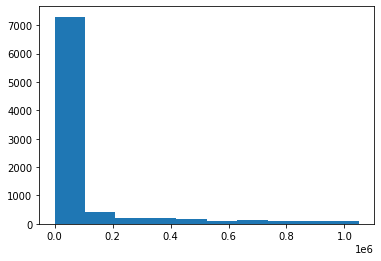

In [51]:
# Plot the looged_in_period column to observe its distribution
plt.hist(users_infromation3.logged_in_period, bins = 10)
plt.show()

In [52]:
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#scale.fit(logged_in_period)

In [53]:
users_infromation3.columns

Index(['user_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'logged_in_period',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [54]:
# Divide the datset into feature and target column
X = users_infromation3.drop(columns = ['user_id'])
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,logged_in_period,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,1,0.0,1,0,0,0,0
1,0,0,1,195840.0,0,1,0,0,0
2,0,0,1,0.0,0,1,0,0,0
3,0,0,1,1440.0,1,0,0,0,0
4,0,0,1,7200.0,1,0,0,0,0


In [55]:
y = users_infromation3['user_id']

In [56]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: user_id, dtype: int64

In [57]:
# Split the X and y into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6176, 9), (2647, 9), (6176,), (2647,))

**Now find out the top best predictors in descending order:**

In [59]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
features_selector = SelectKBest(score_func = f_classif, k = 3)
ordered = features_selector.fit_transform(X_train, y_train)
print(ordered.shape)
a = features_selector.get_support()
print(a)
features = X_train.columns
print(features)
print('List of 3 most influential features on the target (high to low):', features[a].tolist())

(6176, 3)
[False False False  True  True False False  True False]
Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'logged_in_period',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')
List of 3 most influential features on the target (high to low): ['logged_in_period', 'creation_source_GUEST_INVITE', 'creation_source_SIGNUP']


In [60]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
features_selector = SelectKBest(score_func = f_classif, k = 6)
ordered = features_selector.fit_transform(X_train, y_train)
print(ordered.shape)
a = features_selector.get_support()
print(a)
features = X_train.columns
print(features)
print('List of 6 most influencial features on the target (high to low):', features[a].tolist())

(6176, 6)
[ True False  True  True  True False  True  True False]
Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'logged_in_period',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')
List of 6 most influencial features on the target (high to low): ['opted_in_to_mailing_list', 'invited_by_user_id', 'logged_in_period', 'creation_source_GUEST_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP']


In [61]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
features_selector = SelectKBest(score_func = f_classif, k = 9)
ordered = features_selector.fit_transform(X_train, y_train)
print(ordered.shape)
a = features_selector.get_support()
print(a)
features = X_train.columns
print(features)
print('List of all 9 influential features on the target (high to low):', features[a].tolist())

(6176, 9)
[ True  True  True  True  True  True  True  True  True]
Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'invited_by_user_id', 'logged_in_period',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')
List of all 9 influential features on the target (high to low): ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited_by_user_id', 'logged_in_period', 'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']


## Machine Learning Model building 

In [62]:
# Let us built a model with all 9 features
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X,y)
y_predict = lr.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
print("classification_report:\n", classification_report(y_test, y_predict, labels = [1, 0]))

classification_report:
               precision    recall  f1-score   support

           1       0.95      0.87      0.91       493
           0       0.97      0.99      0.98      2154

    accuracy                           0.97      2647
   macro avg       0.96      0.93      0.94      2647
weighted avg       0.97      0.97      0.97      2647



In [64]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict, labels = [1, 0]))

Confusion matrix:
 [[ 428   65]
 [  24 2130]]


In [65]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict, labels = [1, 0], normalize = 'true'))

Confusion matrix:
 [[0.86815416 0.13184584]
 [0.01114206 0.98885794]]


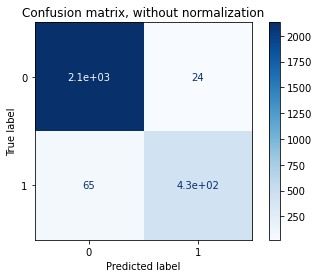

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, cmap = plt.cm.Blues)
plt.title("Confusion matrix, without normalization")
plt.show()

# Summary

The logistic regression with all 9 features can predict the 'adopted user' with an acuuracy of 0.97, precison:0.95, recall:0.87 and f1_score:0.91. This makes the model good enough for future use. 